In [3]:
from ShortCutDesign import ShortCutDesign 
from RigorousDesign import RigorousDesign 

In [ ]:
import numpy as np
import pandas as pd

# Define the bounds as per the given function
bounds = [
    (10, 50),           # Number of stages in extractor
    (0, 0.9999), (0, 0.9999),  # Light key, heavy key for extract distiller
    (0, 0.9999), (0, 0.9999),  # Light key, heavy key for acetic_acid_purification
    (273, 350),         # Temperature for HX
    (0, 0.9999), (0, 0.9999)   # Light key, heavy key for raffinate distiller
]

# Safe parameter generation
def generate_valid_param(low, high, epsilon=1e-4):
    value = np.random.uniform(low, high)
    return max(min(value, high - epsilon), low + epsilon)


# Example shortcut and rigorous result generation functions
def calculate_shortcut(_init_params):
    # Placeholder for the actual shortcut model computation
    shortcut_model = ShortCutDesign()
    shortcut_results = shortcut_model.shortcut_results(_init_params)
    return shortcut_results

def calculate_rigorous(_init_params):
    shortcut_results = calculate_shortcut(_init_params)
    if shortcut_results['CAPEX'] == 0:
        return (shortcut_results, [0, 0, 0])
    RigorousCal = RigorousDesign()
    Rigorous_results = RigorousCal.check_results(_init_params, shortcut_results)
    # Placeholder for the actual rigorous model computation
    return (shortcut_results, Rigorous_results)

# Random search with n iterations
n_iterations = 10
results = []

error_list = []
error_params = []
for _ in range(n_iterations):
    # Generate random parameters within the bounds
    print(f"\n--- Iteration {_+1} Start ---")
    
    try:
        # Generate random parameters with safe boundaries
        params = [
                int(np.random.uniform(low, high)) if idx == 0 else generate_valid_param(low, high)
                for idx, (low, high) in enumerate(bounds)
            ]
        print(f"Generated Parameters: {params}")
        # Calculate shortcut and rigorous results
        shortcut_obj, rigorous_obj = calculate_rigorous(params)
        
        # Combine all results in a single record
        record = params + [
            shortcut_obj['CAPEX'], shortcut_obj['OPEX'], shortcut_obj['AceticAcidWt'], shortcut_obj['BoilupRatio'], 
            shortcut_obj['SplitRatio'], shortcut_obj['NumberStages'], shortcut_obj['FeedStage'],
            rigorous_obj[0], rigorous_obj[1], rigorous_obj[2]
        ]
        print(f"Results Recorded: {record}")
        results.append(record)
    except Exception as e:
        print(f"Error: {e}")
        error_list.append(e)
        error_params.append(params)

    print(f"--- Iteration {_+1} End ---\n")




columns = [
    'Stages', '_Lr1', '_Hr1',
    '_Lr2', '_Hr2', '_T_hex',
    '_Lr3', '_Hr3',
    'Shortcut_CAPEX', 'Shortcut_OPEX', 'Shortcut_AceticAcidWt',
    'Shortcut_BoilupRatio', 'Shortcut_SplitRatio',
    'Shortcut_NumberStages', 'Shortcut_FeedStage',
    'Rigorous_CAPEX', 'Rigorous_OPEX', 'Rigorous_AceticAcidWt'
]


# Create dataframe
results_df = pd.DataFrame(results, columns=columns)



--- Iteration 1 Start ---
Generated Parameters: [15, 0.8960870557118599, 0.967756934119603, 0.7283476926794189, 0.03037849478035173, 313.7077111185757, 0.5723187575351834, 0.8851580778334275]
stages: 12
 ##### An instance of the 'ShortCutDesign' class  has been initialised!
[15, 0.8960870557118599, 0.967756934119603, 0.7283476926794189, 0.03037849478035173, 313.7077111185757, 0.5723187575351834, 0.8851580778334275]
stages: 15
capex_error
setting base model
setting model:  {'BoilupRatio': 4.48, 'Distillate': None, 'SplitRatio': 0.287, 'NumberStages': 9, 'FeedStage': 7}
10000.0
 ##### An instance of the 'RigorousDesign' class  has been initialised!
[15, 0.8960870557118599, 0.967756934119603, 0.7283476926794189, 0.03037849478035173, 313.7077111185757, 0.5723187575351834, 0.8851580778334275]
setting model:  {'CAPEX': None, 'OPEX': 0.8341, 'AceticAcidWt': 0.018715933492543323, 'BoilupRatio': 2.5093459038118895, 'Distillate': <SuperpositionOutlet: s9>, 'SplitRatio': 0.285604968339664, 'Numb

ValueError: 14 columns passed, passed data had 18 columns

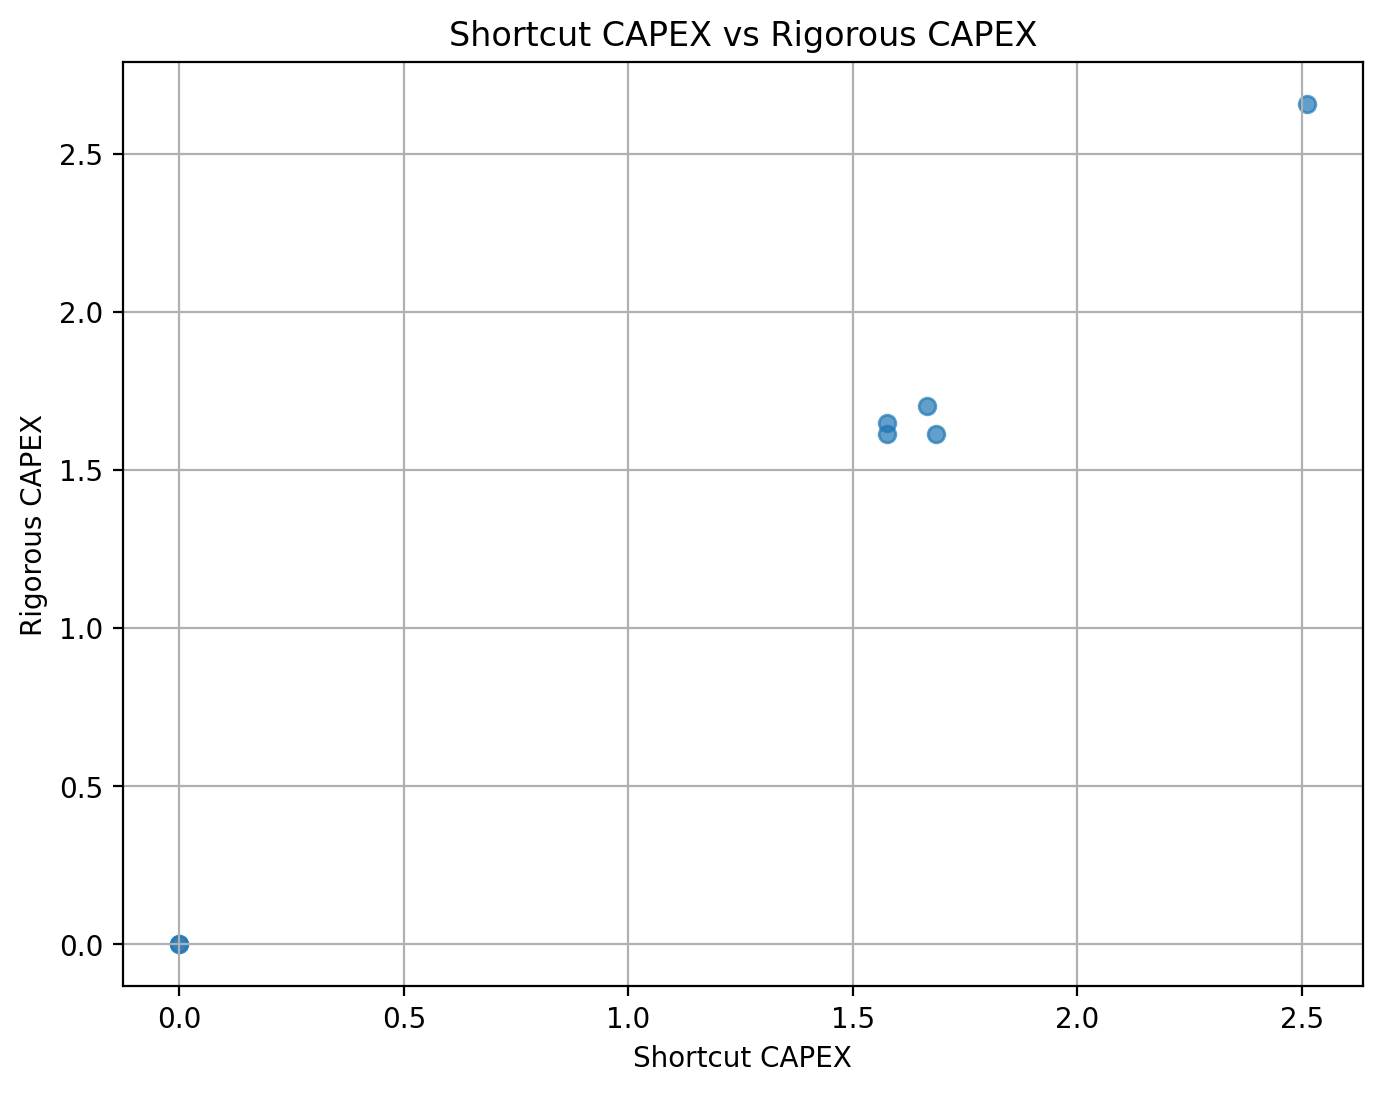

In [8]:
import matplotlib.pyplot as plt

# Filter out invalid or NaN results
valid_results = results_df.dropna(subset=['Shortcut_CAPEX', 'Rigorous_CAPEX'])

# Plotting Shortcut_CAPEX vs Rigorous_CAPEX
plt.figure(figsize=(8, 6))
plt.scatter(valid_results['Shortcut_CAPEX'], valid_results['Rigorous_CAPEX'], alpha=0.7)
plt.xlabel('Shortcut CAPEX')
plt.ylabel('Rigorous CAPEX')
plt.title('Shortcut CAPEX vs Rigorous CAPEX')
plt.grid(True)
plt.show()


In [7]:

columns = [
    'Stages', '_Lr1', '_Hr1',
    '_Lr2', '_Hr2', '_T_hex',
    '_Lr3', '_Hr3',
    'Shortcut_CAPEX', 'Shortcut_OPEX', 'Shortcut_AceticAcidWt',
    'Shortcut_BoilupRatio', 'Shortcut_SplitRatio',
    'Shortcut_NumberStages', 'Shortcut_FeedStage',
    'Rigorous_CAPEX', 'Rigorous_OPEX', 'Rigorous_AceticAcidWt'
]


# Create dataframe
results_df = pd.DataFrame(results, columns=columns)